In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
mpg_df=pd.read_csv("mpg.csv")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [58]:
X=mpg_df[['cylinders','displacement','horsepower','weight','acceleration']]
y=mpg_df['mpg']

In [59]:
X.dtypes

cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
dtype: object

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Custom Linear Regression Code

In [61]:
import scipy.linalg as la
class LinearRegression:
    
    beta_values= None
    
    def __init__(self):
        beta_values= None
        
    def fit(self,X,y):
        
        if isinstance(X, pd.DataFrame):
            X = X.as_matrix()
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y=y.as_matrix()
        self.beta_values = la.cho_solve(la.cho_factor(X.T @ X + 0.0001*np.identity(X.shape[1])),X.T @y)               
        
    def predict(self, X_p): 

        if isinstance(X_p, pd.DataFrame):
            X_p = X_p.as_matrix()
            
        pred = X_p @ self.beta_values
        return pred
        


In [62]:
from sklearn.metrics import mean_squared_error
lr= LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mean_squared_error(y_test, y_pred)

31.925753589245623

## Scikit Learn Linear Regression Code

In [63]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
scikit_y_pred = regr.predict(X_test)
mean_squared_error(y_test, scikit_y_pred)

19.714917092837378

## Comparision

In [64]:
print("MSE of custom LR:")
mean_squared_error(y_test, y_pred)

MSE of custom LR:


31.925753589245623

In [65]:
print("MSE of Scikit-learn LR:")
mean_squared_error(y_test, scikit_y_pred)

MSE of Scikit-learn LR:


19.714917092837378

In [66]:
print("Beta values of custom LR:")
lr.beta_values

Beta values of custom LR:


array([ 2.59478611, -0.06494916,  0.11814701, -0.00600659,  1.76808552])

In [67]:
print("Beta values of scikit-learn LR:")
regr.coef_

Beta values of scikit-learn LR:


array([-0.26226222, -0.0019563 , -0.05984964, -0.00494017,  0.00403349])

## Plots

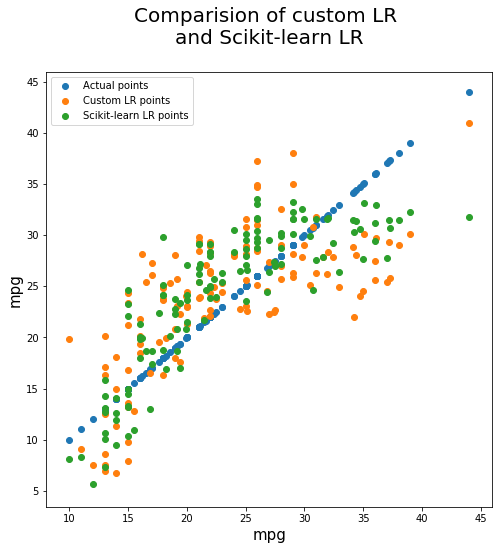

In [79]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_test,label="Actual points")
plt.scatter(y_test,y_pred,label="Custom LR points")
plt.scatter(y_test,scikit_y_pred,label="Scikit-learn LR points")
plt.legend()
plt.title('Comparision of custom LR \nand Scikit-learn LR\n',fontsize=20)
plt.xlabel('mpg',fontsize=15)
plt.ylabel('mpg',fontsize=15)
plt.show()